<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday08022022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.pylab as pl
import math
from collections import Counter
import csv

In [144]:
all = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-25/ratings.csv', skiprows=0)
df = all[0:30]

df.sort_values(['rank'])
df.reset_index()

,index,num,id,name,year,rank,average,bayes_average,users_rated,url,thumbnail
0,0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...
5,5,191,9209,Ticket to Ride,2004,192,7.41,7.305,76171,/boardgame/9209/ticket-ride,https://cf.geekdo-images.com/ZWJg0dCdrWHxVnc0e...
6,6,100,178900,Codenames,2015,101,7.60,7.508,74419,/boardgame/178900/codenames,https://cf.geekdo-images.com/F_KDEu0GjdClml8N7...
7,7,3,167791,Terraforming Mars,2016,4,8.42,8.274,74216,/boardgame/167791/terraforming-mars,https://cf.geekdo-images.com/wg9oOLcsKvDesSUdZ...
8,8,15,173346,7 Wonders Duel,2015,16,8.11,7.984,69472,/boardgame/173346/7-wonders-duel,https://cf.geekdo-images.com/WzNs1mA_o22ZWTR8f...
9,9,35,31260,Agricola,2007,36,7.93,7.809,66093,/boardgame/31260/agricola,https://cf.geekdo-images.com/dDDo2Hexl80ucK1Il...


In [145]:
name = df.loc[:, ['name']]
thumb = df.loc[:, ['thumbnail']]
users = np.array(df.loc[:, ['users_rated']])
avg = df.loc[:, ['average']]


print(type(users))

<class 'numpy.ndarray'>


In [150]:
# Miscell. design settings
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/Avenir.ttc')
#mpl.rc('font', family='Avenir')  # Changing all runtime fonts into Avenir

globalcolour = 'w'

mpl.rcParams['axes.linewidth'] = 0.3
mpl.rcParams['axes.edgecolor'] = 'w'
mpl.rcParams['xtick.color'] = globalcolour
mpl.rcParams['ytick.color'] = globalcolour
mpl.rcParams['axes.labelcolor'] = globalcolour
mpl.rcParams['axes.titlecolor'] = globalcolour

mpl.rcParams["font.weight"] = "bold"

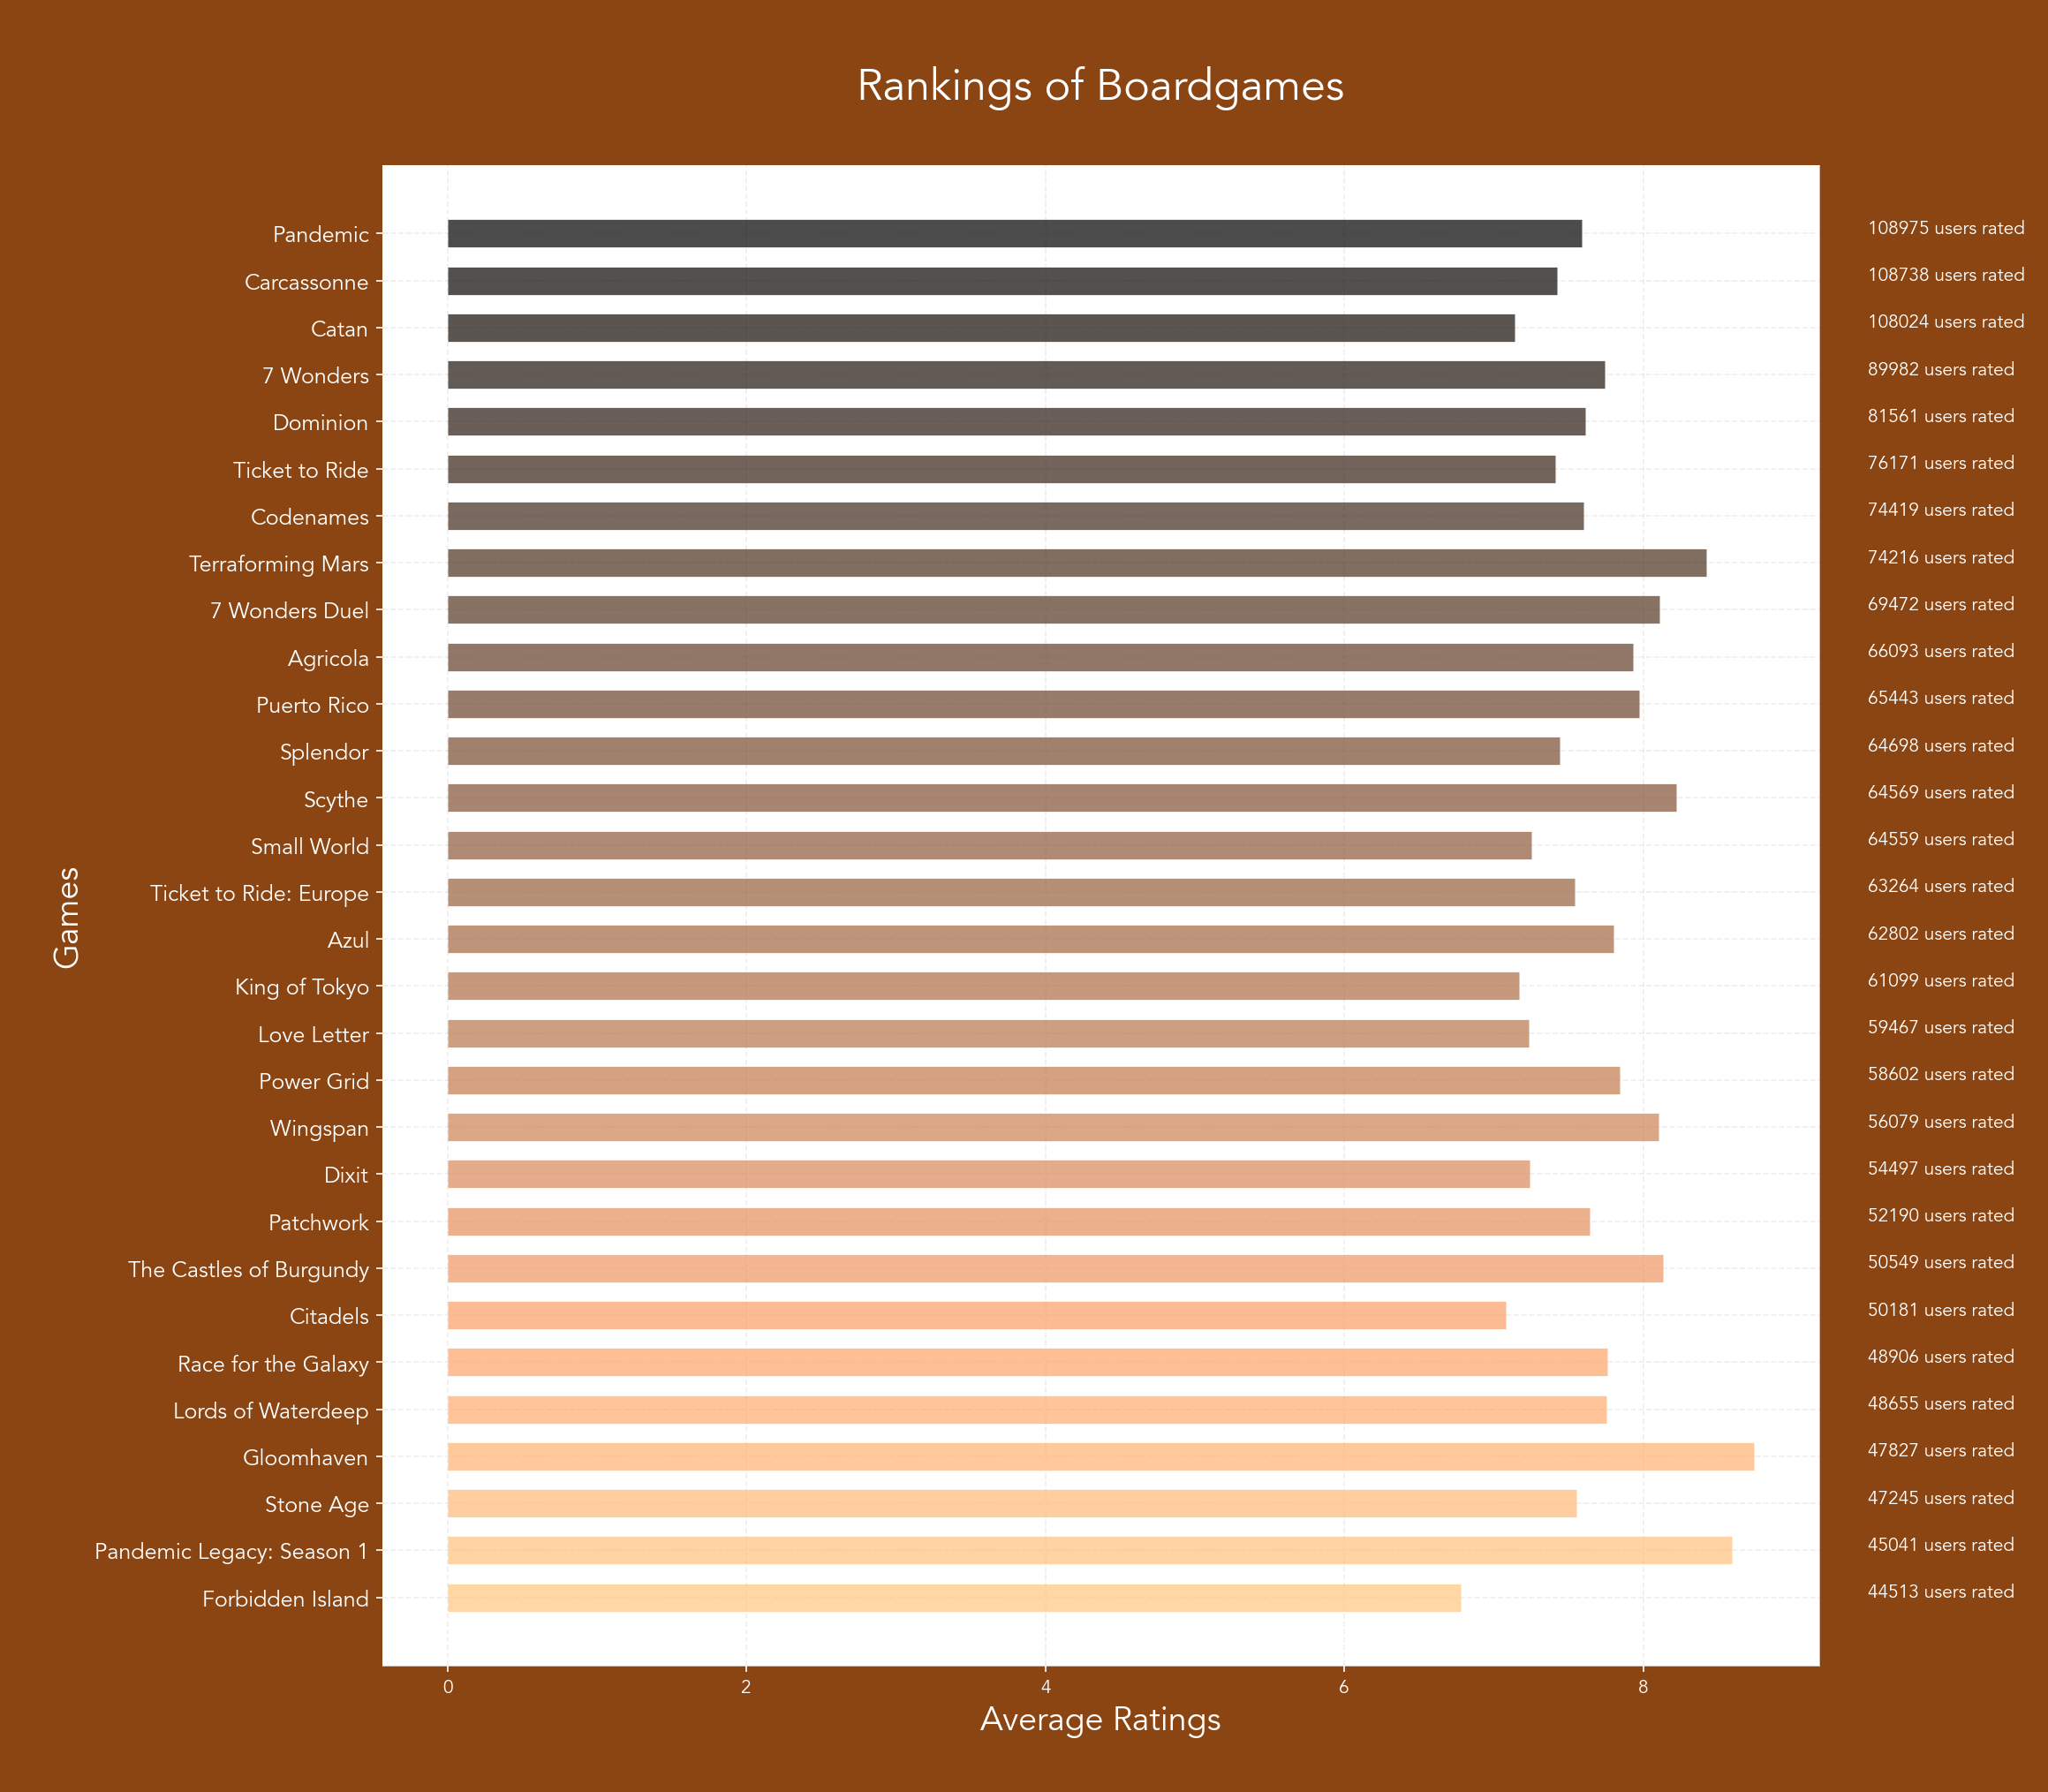

In [152]:
width = 14

plt.figure(figsize=(width,0.5*len(users)), dpi=150, facecolor='saddlebrown')

colors = pl.cm.copper(np.linspace(0,1,max(df.index)+1))

for i in df.index:
  plt.hlines(y=-i, xmin=0, xmax=df.loc[i, ['average']], color=colors[i], alpha=0.7, linewidth=15)

for i in df.index:
  plt.text(width-4.5, -i, str(str(users[i])[1:-1] + ' users rated  '), color=globalcolour, fontsize=10, alpha=1)

plt.ylabel('\nGames', fontdict={'size':18})
plt.xlabel('Average Ratings\n', fontdict={'size':18})

plt.yticks(-1* df.index, df.name, fontsize=12)

plt.title('\nRankings of Boardgames\n', fontdict={'size':24})
plt.grid(linestyle='--', alpha=0.2)

plt.show()